## load data & import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 200)

In [2]:
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")
train_labels_df = pd.read_csv("../data/raw/train_labels.csv")
target_pairs_df = pd.read_csv("../data/raw/target_pairs.csv")  

## General data description

### Overview columns and general structure

In [3]:
train_df.info(show_counts=True, max_cols = 600, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 558 columns):
 #    Column                                          Non-Null Count  Dtype  
---   ------                                          --------------  -----  
 0    date_id                                         1917 non-null   int64  
 1    LME_AH_Close                                    1867 non-null   float64
 2    LME_CA_Close                                    1867 non-null   float64
 3    LME_PB_Close                                    1867 non-null   float64
 4    LME_ZS_Close                                    1867 non-null   float64
 5    JPX_Gold_Mini_Futures_Open                      1802 non-null   float64
 6    JPX_Gold_Rolling-Spot_Futures_Open              1802 non-null   float64
 7    JPX_Gold_Standard_Futures_Open                  1802 non-null   float64
 8    JPX_Platinum_Mini_Futures_Open                  1802 non-null   float64
 9    JPX_Platinum_Standard_Future

In [4]:
test_df.info(show_counts=True, max_cols = 600, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 559 columns):
 #    Column                                          Non-Null Count  Dtype  
---   ------                                          --------------  -----  
 0    date_id                                         90 non-null     int64  
 1    LME_AH_Close                                    88 non-null     float64
 2    LME_CA_Close                                    88 non-null     float64
 3    LME_PB_Close                                    88 non-null     float64
 4    LME_ZS_Close                                    88 non-null     float64
 5    JPX_Gold_Mini_Futures_Open                      85 non-null     float64
 6    JPX_Gold_Rolling-Spot_Futures_Open              85 non-null     float64
 7    JPX_Gold_Standard_Futures_Open                  85 non-null     float64
 8    JPX_Platinum_Mini_Futures_Open                  85 non-null     float64
 9    JPX_Platinum_Standard_Futures_Op

In [5]:
train_labels_df.info(show_counts=True, max_cols = 600, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 425 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    date_id     1917 non-null   int64  
 1    target_0    1787 non-null   float64
 2    target_1    1744 non-null   float64
 3    target_2    1831 non-null   float64
 4    target_3    1831 non-null   float64
 5    target_4    1631 non-null   float64
 6    target_5    1631 non-null   float64
 7    target_6    1831 non-null   float64
 8    target_7    1744 non-null   float64
 9    target_8    1587 non-null   float64
 10   target_9    1831 non-null   float64
 11   target_10   1587 non-null   float64
 12   target_11   1831 non-null   float64
 13   target_12   1712 non-null   float64
 14   target_13   1831 non-null   float64
 15   target_14   1712 non-null   float64
 16   target_15   1831 non-null   float64
 17   target_16   1744 non-null   float64
 18   target_17   1587 non-null   float64
 19   targ

In [6]:
target_pairs_df.info(show_counts=True, max_cols = 600, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  424 non-null    object
 1   lag     424 non-null    int64 
 2   pair    424 non-null    object
dtypes: int64(1), object(2)
memory usage: 71.0 KB


### Inspect time dimension

In [7]:
train_df["date_id"].min(), train_df["date_id"].max()

(np.int64(0), np.int64(1916))

In [8]:
test_df["date_id"].min(), test_df["date_id"].max()

(np.int64(1827), np.int64(1916))

--> The test_df is a slice of the train_df

---

### Inspect the target

The target is structured as follows:
* in "train_labels_df" the targets are columnwise listed with their respective log return (explaination below) 
* The "target_pairs_df" is a mapping table to assign the respective columns of "train_labels_df" to the correct asset / asset_difference 

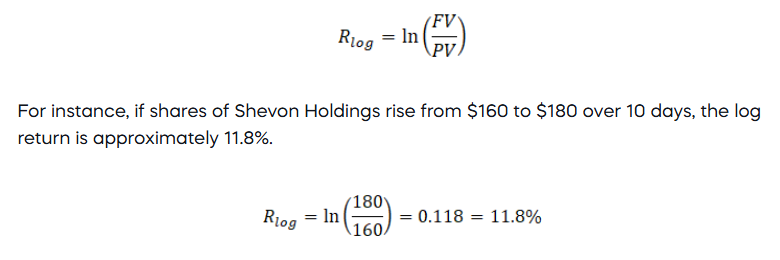

In [9]:
train_labels_df

,date_id,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,0.005948,-0.002851,-0.004675,-0.000639,NaN,NaN,-0.006729,0.006066,NaN,...,NaN,0.021239,-0.005595,NaN,-0.004628,0.033793,NaN,0.038234,NaN,0.027310
1,1,0.005783,-0.024118,-0.007052,-0.018955,-0.031852,-0.019452,0.003002,-0.006876,-0.002042,...,0.003377,0.021372,-0.001517,0.012846,0.010547,0.030527,-0.000764,0.025021,0.003548,0.020940
2,2,0.001048,0.023836,-0.008934,-0.022060,NaN,NaN,0.037449,0.007658,NaN,...,-0.006712,0.009308,0.001857,-0.012761,-0.002345,0.017529,-0.005394,0.004835,-0.009075,0.001706
3,3,0.001700,-0.024618,0.011943,0.004778,NaN,NaN,-0.012519,-0.016896,NaN,...,NaN,0.036880,-0.015189,NaN,0.008118,0.001079,NaN,-0.015102,NaN,-0.033010
4,4,-0.003272,0.005234,0.006856,0.013312,0.023953,0.010681,-0.011649,0.002019,0.003897,...,NaN,0.004937,NaN,-0.006673,-0.016105,-0.004885,NaN,NaN,0.009514,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1912,-0.012596,0.009309,0.007947,0.006477,-0.026216,-0.029487,-0.003287,0.011751,-0.027610,...,NaN,NaN,NaN,0.042052,NaN,NaN,NaN,NaN,0.031006,NaN
1913,1913,-0.000736,-0.001292,-0.005137,-0.007961,-0.008494,-0.011547,0.004263,0.005670,-0.004822,...,-0.012992,-0.003349,0.010912,0.006198,-0.009216,-0.003038,-0.026082,-0.008057,-0.002069,-0.141053
1914,1914,-0.002294,0.012898,0.009978,0.001567,0.002596,-0.007373,0.007554,0.002661,0.004083,...,-0.005240,0.004044,0.004459,0.002619,0.001308,-0.006772,-0.019918,-0.013304,-0.005527,-0.127688
1915,1915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.008250,0.012842,0.009076,0.000932,0.011613,0.003825,0.024350,-0.006928,0.006805,-0.012187


In [10]:
target_pairs_df

,target,lag,pair
0,target_0,1,US_Stock_VT_adj_close
1,target_1,1,LME_PB_Close - US_Stock_VT_adj_close
2,target_2,1,LME_CA_Close - LME_ZS_Close
3,target_3,1,LME_AH_Close - LME_ZS_Close
4,target_4,1,LME_AH_Close - JPX_Gold_Standard_Futures_Close
...,...,...,...
419,target_419,4,FX_NOKUSD - LME_AH_Close
420,target_420,4,JPX_Gold_Standard_Futures_Close - US_Stock_RY_...
421,target_421,4,US_Stock_EWT_adj_close - LME_AH_Close
422,target_422,4,JPX_Platinum_Standard_Futures_Close - FX_NOKCHF


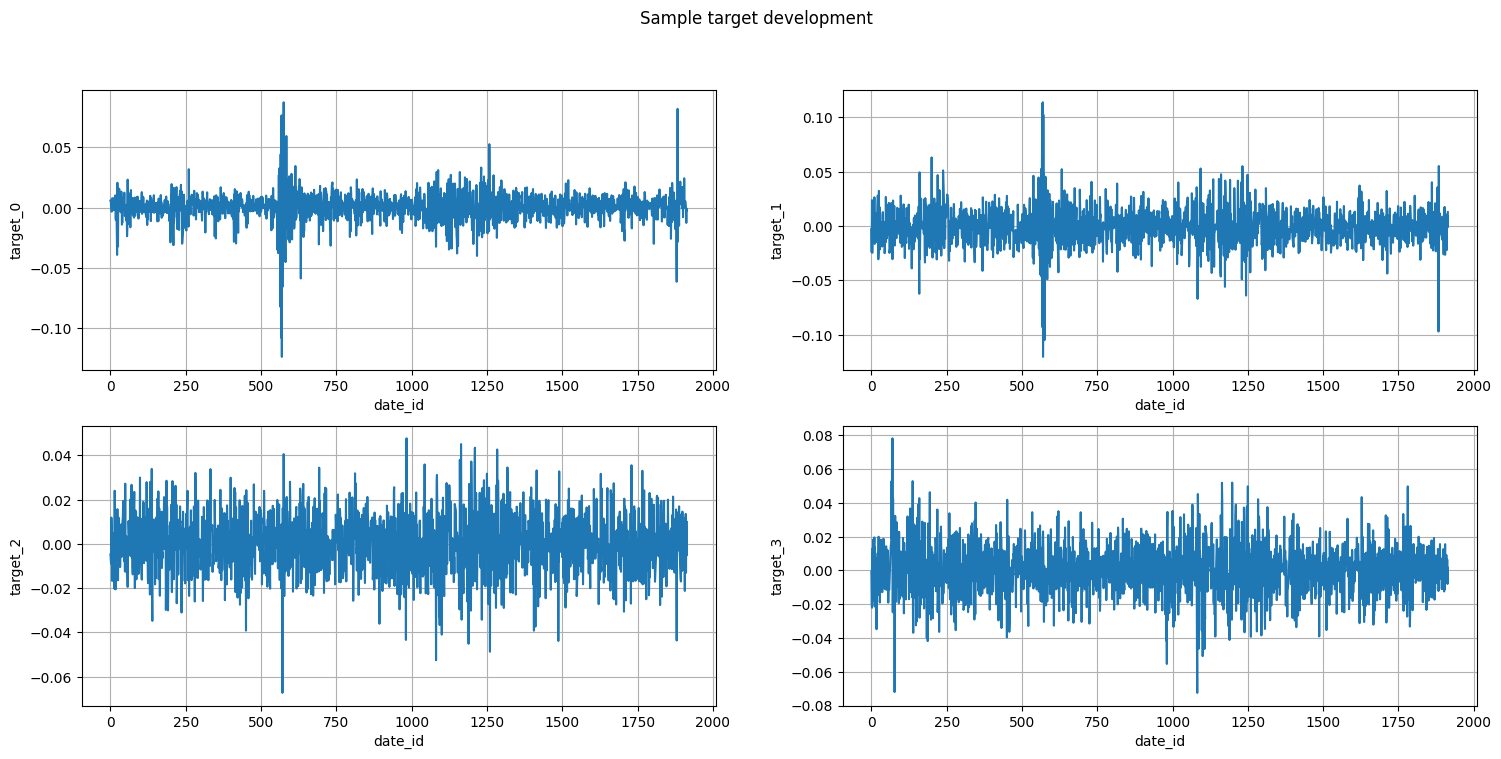

In [11]:
cols = ["date_id" ,"target_0", "target_1", "target_2", "target_3"]

fig, sub = plt.subplots(2,2, figsize = (18,8))
subs = sub.flatten()

for i, col in enumerate(cols[1:]):

    sns.lineplot(x = train_labels_df[cols]["date_id"], y = train_labels_df[cols][col], ax = subs[i])
    subs[i].grid()

fig.suptitle("Sample target development");

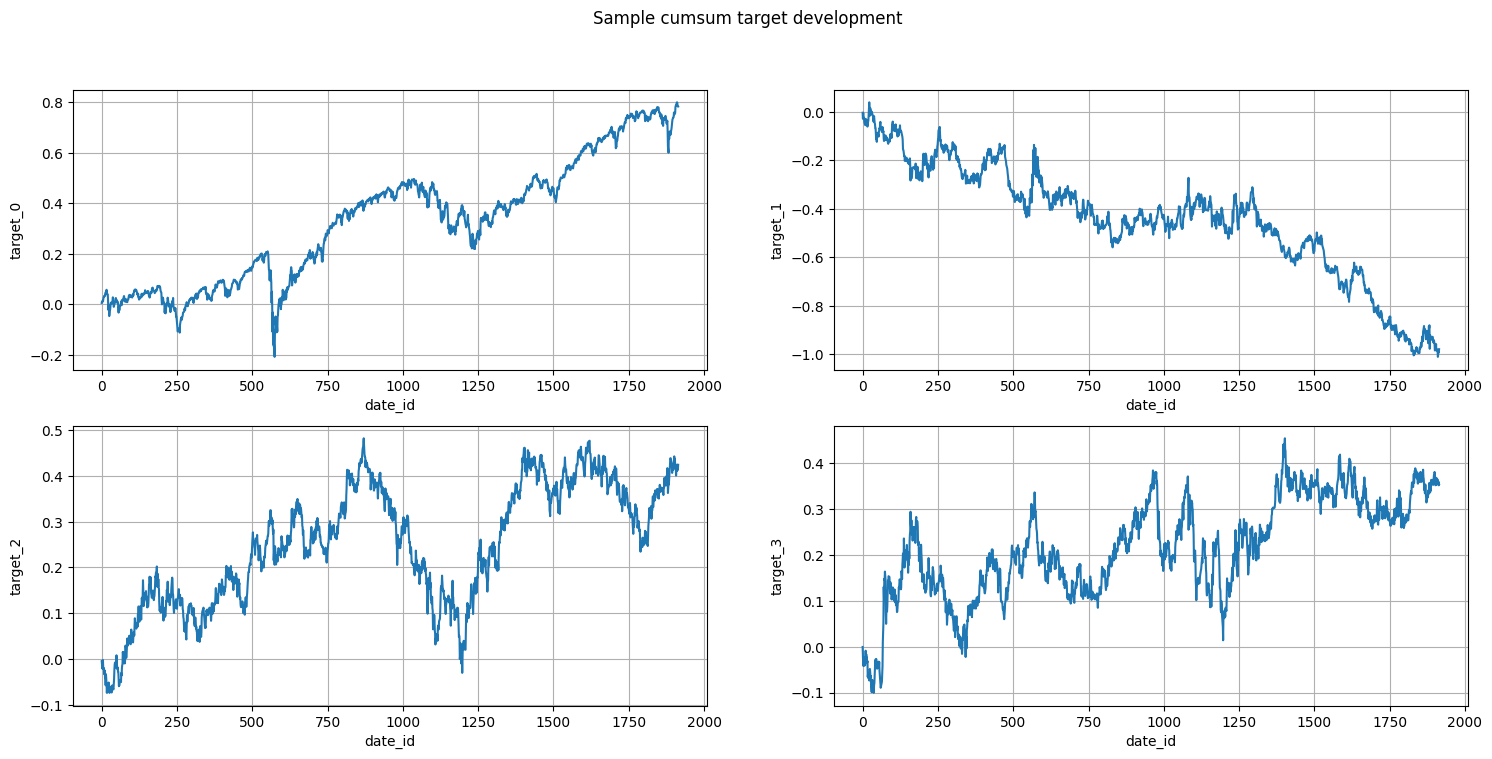

In [12]:
cols = ["date_id" ,"target_0", "target_1", "target_2", "target_3"]

fig, sub = plt.subplots(2,2, figsize = (18,8))
subs = sub.flatten()

for i, col in enumerate(cols[1:]):

    sns.lineplot(x = train_labels_df[cols]["date_id"], y = train_labels_df[cols][col].cumsum(), ax = subs[i])
    subs[i].grid()

fig.suptitle("Sample cumsum target development");

## Understand the target calculation

In [13]:
y_target = train_labels_df[train_labels_df["date_id"].isin(test_df["date_id"])]
y_target.head()

,date_id,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
1827,1827,NaN,NaN,0.017868,-0.000205,-0.016391,-0.013827,0.009972,NaN,NaN,...,NaN,0.019701,NaN,-0.027030,0.043602,0.027982,NaN,NaN,0.002177,NaN
1828,1828,0.002560,-0.004592,-0.001776,0.000271,-0.016696,-0.020025,0.002514,0.002204,-0.011962,...,0.012063,0.012081,-0.020068,0.002858,0.019154,0.019018,0.003875,-0.035202,0.011246,0.099241
1829,1829,0.005346,-0.014539,0.019542,0.014626,-0.011631,-0.009223,-0.005199,-0.026092,-0.003865,...,-0.009004,0.016166,-0.028919,-0.007297,0.033262,0.023174,-0.028512,-0.017900,-0.002096,0.121451
1830,1830,0.000082,-0.005226,0.011452,0.013346,0.008228,-0.014819,-0.011792,-0.007148,0.005712,...,-0.013857,-0.007742,-0.018436,0.004691,0.013311,0.000589,-0.014500,-0.046444,0.009058,0.109246
1831,1831,-0.011469,0.016613,-0.023765,-0.018744,-0.011878,0.007257,0.019829,0.006618,-0.015351,...,-0.015625,-0.018850,-0.025373,0.031197,0.005873,-0.005650,-0.022926,-0.027990,0.011267,0.091318


In [14]:
y_pred_preparation = train_df[train_df["date_id"].isin(test_df["date_id"])]
y_pred_preparation.head()

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
1827,1827,2684.5,9190.0,1967.0,2942.0,13623.0,13920.0,13618.0,4696.0,4692.0,...,1.763116,0.631633,0.808485,0.510666,0.051733,0.071654,0.079797,0.048828,13.631347,0.043845
1828,1828,2691.5,9275.0,1985.0,2963.5,13640.0,13922.0,13634.0,4613.0,4613.0,...,1.763604,0.633526,0.812571,0.514785,0.051802,0.071793,0.080214,0.048912,13.743387,0.043778
1829,1829,2646.0,9284.5,1971.0,2914.0,13634.0,13923.0,13638.0,4647.0,4632.0,...,1.769694,0.632156,0.811948,0.513278,0.051902,0.071630,0.080134,0.048971,13.766241,0.043774
1830,1830,2634.0,9223.5,1967.0,2900.0,13681.5,13962.0,13680.0,4630.0,4631.0,...,1.772475,0.629661,0.815155,0.513271,0.051907,0.071972,0.080325,0.048968,13.864629,0.043876
1831,1831,2623.5,9232.0,1949.0,2846.5,13849.5,14141.0,13844.0,4699.5,4703.0,...,1.776607,0.630969,0.816284,0.515051,0.051867,0.071790,0.080475,0.049027,13.847691,0.043736


In [15]:
lag_1 = target_pairs_df[target_pairs_df["lag"] == 1].copy()
lag_1.loc[:, "asset_1"] = lag_1["pair"].str.split("-").str[0]
lag_1.loc[:, "asset_2"] = lag_1["pair"].str.split("-").str[1]

lag_1.head()

,target,lag,pair,asset_1,asset_2
0,target_0,1,US_Stock_VT_adj_close,US_Stock_VT_adj_close,NaN
1,target_1,1,LME_PB_Close - US_Stock_VT_adj_close,LME_PB_Close,US_Stock_VT_adj_close
2,target_2,1,LME_CA_Close - LME_ZS_Close,LME_CA_Close,LME_ZS_Close
3,target_3,1,LME_AH_Close - LME_ZS_Close,LME_AH_Close,LME_ZS_Close
4,target_4,1,LME_AH_Close - JPX_Gold_Standard_Futures_Close,LME_AH_Close,JPX_Gold_Standard_Futures_Close


In [19]:
target_0 = ["US_Stock_VT_adj_close"]
target_1 = ["LME_PB_Close", "US_Stock_VT_adj_close"]

target_0_df = y_target["target_0"].copy().to_frame()
target_1_df = y_target["target_1"].copy().to_frame()

In [20]:
y_pred_preparation_target_0 = y_pred_preparation[target_0].copy()
y_pred_preparation_target_0["target_0_pred"] = np.log(y_pred_preparation[target_0] / y_pred_preparation[target_0].shift(1))
target_0_df = pd.concat([target_0_df, y_pred_preparation_target_0.shift(-2)], axis = 1)
target_0_df["diff"] = target_0_df["target_0"] - target_0_df["target_0_pred"]
target_0_df["diff_rounded"] = np.round(target_0_df["diff"], 0)

target_0_df.head()

,target_0,US_Stock_VT_adj_close,target_0_pred,diff,diff_rounded
1827,NaN,120.5361,NaN,NaN,NaN
1828,0.002560,120.8451,0.002560,-3.122502e-17,-0.0
1829,0.005346,121.4929,0.005346,-7.806256e-17,-0.0
1830,0.000082,121.5029,0.000082,-4.157915e-17,-0.0
1831,-0.011469,120.1174,-0.011469,5.724587e-17,0.0


In [21]:
y_pred_preparation_target_1 = y_pred_preparation[target_1].copy()
y_pred_preparation_target_1["target_1_pred"] = np.log(
                                (y_pred_preparation[target_1[0]] / y_pred_preparation[target_1[0]].shift(1)) /
                                (y_pred_preparation[target_1[1]] / y_pred_preparation[target_1[1]].shift(1))
                            )

target_1_df = pd.concat([target_1_df, y_pred_preparation_target_1.shift(-2)], axis = 1)
target_1_df["diff"] = target_1_df["target_1"] - target_1_df["target_1_pred"]
target_1_df["diff_rounded"] = np.round(target_1_df["diff"], 0)

target_1_df.head()

,target_1,LME_PB_Close,US_Stock_VT_adj_close,target_1_pred,diff,diff_rounded
1827,NaN,1971.0,120.5361,NaN,NaN,NaN
1828,-0.004592,1967.0,120.8451,-0.004592,3.642919e-17,0.0
1829,-0.014539,1949.0,121.4929,-0.014539,8.673617e-17,0.0
1830,-0.005226,1939.0,121.5029,-0.005226,-3.209238e-17,-0.0
1831,0.016613,1949.0,120.1174,0.016613,8.673617e-17,0.0


In [33]:
def prepare_target_pairs(df) -> dict:
    """ Prepare target pairs for analysis.

    Args:
        df (pd.DataFrame): DataFrame containing target pairs incl. lag assignment. 

    Returns:
        dict: Resolved relationships between targets and assets, grouped by lag.
    """

    output_dict = dict()
    distinct_lags = df["lag"].unique().tolist()

    for i, lag in enumerate(distinct_lags):

        df_tmp = df[df["lag"] == i+1].copy()
        df_tmp.loc[:, "asset_1"] = df_tmp["pair"].str.split("-").str[0]
        df_tmp.loc[:, "asset_2"] = df_tmp["pair"].str.split("-").str[1]

        output_dict[f"lag_{i+1}"] = df_tmp[["target", "asset_1", "asset_2"]]
    
    return output_dict

In [34]:
target_pairs_prep = prepare_target_pairs(target_pairs_df)

## Evaluation Metric

https://www.kaggle.com/code/metric/mitsui-co-commodity-prediction-metric

In [43]:
SOLUTION_NULL_FILLER = -999999


def rank_correlation_sharpe_ratio(merged_df: pd.DataFrame) -> float:
    """
    Calculates the rank correlation between predictions and target values,
    and returns its Sharpe ratio (mean / standard deviation).

    :param merged_df: DataFrame containing prediction columns (starting with 'prediction_')
                      and target columns (starting with 'target_')
    :return: Sharpe ratio of the rank correlation
    :raises ZeroDivisionError: If the standard deviation is zero
    """
    prediction_cols = [col for col in merged_df.columns if col.startswith('prediction_')]
    target_cols = [col for col in merged_df.columns if col.startswith('target_')]

    def _compute_rank_correlation(row):
        non_null_targets = [col for col in target_cols if not pd.isnull(row[col])]
        matching_predictions = [col for col in prediction_cols if col.replace('prediction', 'target') in non_null_targets]
        if not non_null_targets:
            raise ValueError('No non-null target values found')
        if row[non_null_targets].std(ddof=0) == 0 or row[matching_predictions].std(ddof=0) == 0:
            raise ZeroDivisionError('Denominator is zero, unable to compute rank correlation.')
        return np.corrcoef(row[matching_predictions].rank(method='average'), row[non_null_targets].rank(method='average'))[0, 1]

    daily_rank_corrs = merged_df.apply(_compute_rank_correlation, axis=1)
    std_dev = daily_rank_corrs.std(ddof=0)
    if std_dev == 0:
        raise ZeroDivisionError('Denominator is zero, unable to compute Sharpe ratio.')
    sharpe_ratio = daily_rank_corrs.mean() / std_dev
    return float(sharpe_ratio)


def score(solution: pd.DataFrame, submission: pd.DataFrame, row_id_column_name: str) -> float:
    """
    Calculates the rank correlation between predictions and target values,
    and returns its Sharpe ratio (mean / standard deviation).
    """
    del solution[row_id_column_name]
    del submission[row_id_column_name]
    assert all(solution.columns == submission.columns)

    submission = submission.rename(columns={col: col.replace('target_', 'prediction_') for col in submission.columns})

    # Not all securities trade on all dates, but solution files cannot contain nulls.
    # The filler value allows us to handle trading halts, holidays, & delistings.
    solution = solution.replace(SOLUTION_NULL_FILLER, None)
    return rank_correlation_sharpe_ratio(pd.concat([solution, submission], axis='columns'))

## Submission